<a href="https://colab.research.google.com/github/yous92/ML-Workshop/blob/main/1_Linear_Regression_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression with Numpy


In [ ]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

### 1. Dataset

Generate random data with a linear trend using `make_regression`: We have a dataset \((x, y)\) containing 100 examples with a single variable \(x\). Note: each time the cell is executed, different data will be generated. Use `np.random.seed(0)` to reproduce the same dataset each time.


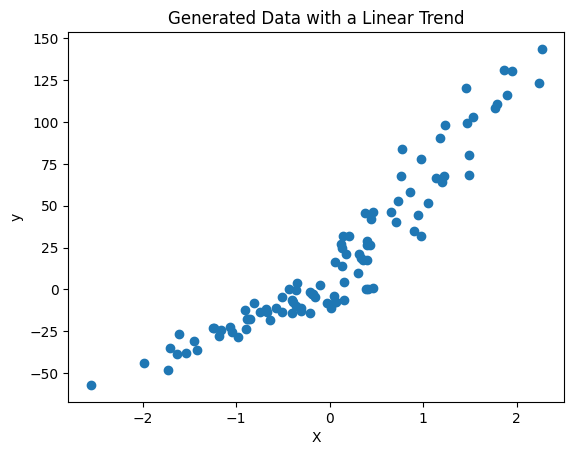

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# Set the seed for reproducibility
np.random.seed(0)

# Generate the dataset
x, y = make_regression(n_samples=100, n_features=1, noise=10)


# Plot the data: X on the x-axis and y on the y-axis
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Generated Data with a Linear Trend')
plt.show()


Important: Check the dimensions of x and y. Notice that y does not have the dimensions (100, 1). We fix the issue with np.reshape.

In [ ]:
print(x.shape)
print(y.shape)

y = y.reshape(y.shape[0], 1)

print(y.shape)

(100, 1)
(100,)
(100, 1)


Creation of matrix X, which includes the bias column. To do this, we concatenate the vector x with a vector of ones (using np.ones) that has the same number of rows as x.

In [ ]:
X = np.hstack((x, np.ones(x.shape))) # Horizontally stacks the vector x and a column of ones
print(X.shape)

(100, 2)


Finally, create a parameter vector `θ`, initialized with random coefficients. This vector has dimensions `(2, 1)`. If you want to reproduce the same vector `θ` each time, use `np.random.seed(0` as before.

In [ ]:
np.random.seed(0)
theta = np.random.randn(2, 1)
theta

array([[1.76405235],
       [0.40015721]])

# 2. Linear Model

We implement a model  $F = X.\theta$, and then test the model to ensure there are no bugs (as a good practice). Additionally, this allows us to see what the initial model looks like, defined by the value of $\theta$.


In [ ]:
def model(X, theta):
    return X.dot(theta)

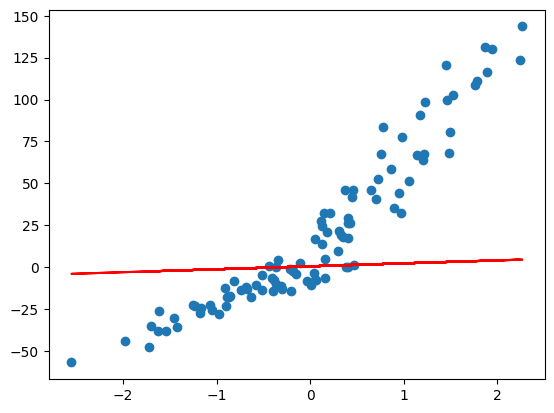

In [ ]:
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')

# 3. Cost Function: Mean Squared Error

We measure the model's errors on the dataset  X, y by implementing the Mean Squared Error (MSE) function.

$ J(\theta) = \frac{1}{2m} \sum (X.\theta - y)^2 $

Next, we test our function to check for any bugs.


In [ ]:
def cost_function(X, y, theta):
    m = len(y)  # m = number of samples in our dataset
    return 1 / (2 * m) * np.sum((model(X, theta) - y) ** 2)


In [ ]:
cost_function(X, y, theta)

1196.2801243299011

# 4. Gradients and Gradient Descent

We implement the gradient formula for **MSE**:

$$
\frac{\partial J(\theta)}{\partial \theta} = \frac{1}{m} X^T \cdot (X \cdot \theta - y)
$$

Next, we use this function in gradient descent:

$$
\theta = \theta - \alpha \frac{\partial J(\theta)}{\partial \theta}
$$


In [ ]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [ ]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)  # Create an array to store the cost evolution of the model

    for i in range(n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)  # Update the parameter theta (gradient descent formula)
        cost_history[i] = cost_function(X, y, theta)  # Record the cost value at iteration i in cost_history[i]

    return theta, cost_history


# 5. Training Phase

We define a **number of iterations** and a **learning rate $\alpha$**, and let's get started!

Once the model is trained, we observe the results in relation to our dataset.


In [ ]:
n_iterations = 1000
learning_rate = 0.001


theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [ ]:
theta_final  # Here are the model parameters once the machine has been trained


array([[28.65822145],
       [11.72773626]])

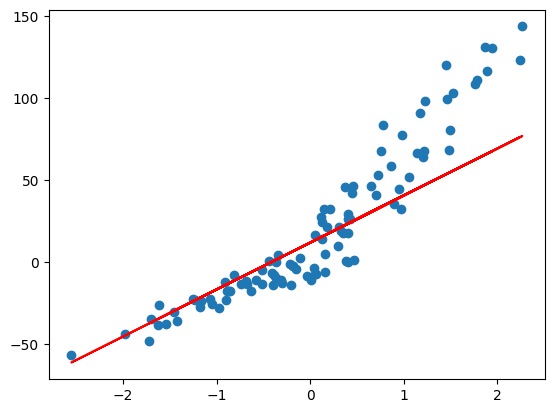

In [ ]:
# Create a predictions vector containing the predictions of our final model
predictions = model(X, theta_final)

# Display the prediction results (in red) compared to our dataset (in blue)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')


# 6. Learning Curves

To check if our gradient descent algorithm worked correctly, we observe the evolution of the cost function across iterations. We should obtain a curve that decreases with each iteration until it stabilizes at a minimal level (close to zero). If the curve does not follow this pattern, the **learning_rate** might be too high, and a smaller learning rate should be considered.


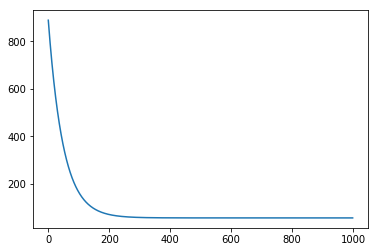

In [ ]:
plt.plot(range(n_iterations), cost_history)

# 7. Final Evaluation

To evaluate the actual performance of our model with a popular metric (for your boss, client, or colleagues), we can use the **coefficient of determination**, also known as $R^2$. It comes from the least squares method. The closer the result is to 1, the better your model.

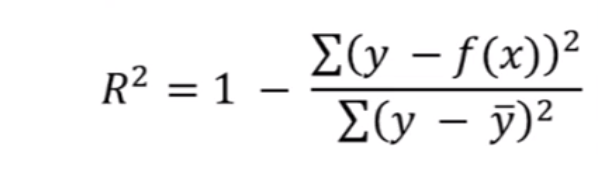

In [ ]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [ ]:
coef_determination(y, predictions)

0.9417294706504984